In [9]:
# Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime


# Create dataframes
df_ca = pd.read_csv("./videos/CAvideos.csv")
df_de = pd.read_csv("./videos/DEvideos.csv")
df_fr = pd.read_csv("./videos/FRvideos.csv")
df_gb = pd.read_csv("./videos/GBvideos.csv")
df_in = pd.read_csv("./videos/INvideos.csv")
df_jp = pd.read_csv("./videos/JPvideos.csv", encoding="ISO-8859-1")
df_kr = pd.read_csv("./videos/KRvideos.csv", encoding="ISO-8859-1")
df_mx = pd.read_csv("./videos/MXvideos.csv", encoding="ISO-8859-1")
df_ru = pd.read_csv("./videos/RUvideos.csv", encoding="ISO-8859-1")
df_us = pd.read_csv("./videos/USvideos.csv")

## Data Cleaning : US Videos

In [10]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

> We can see if the table information above that a couple of columns (publish_time and trending_date) are object types, but we want to convert those to datetime format in order to do time analysis

### Remove Duplicates

In [11]:
print('# rows before cleaning duplicates: ', df_us.shape[0])
df_us.drop_duplicates(keep="first", inplace=True)
print('# rows after cleaning duplicates: ', df_us.shape[0], '\n')

# rows before cleaning duplicates:  40949
# rows after cleaning duplicates:  40901 



### Convert strings to Datetime objects

In [12]:
df_us.publish_time = pd.to_datetime(df_us.publish_time)
df_us.trending_date = df_us.trending_date.apply(lambda x : datetime.strptime(x, "%y.%d.%m"))

In [13]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40901 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40901 non-null  object             
 1   trending_date           40901 non-null  datetime64[ns]     
 2   title                   40901 non-null  object             
 3   channel_title           40901 non-null  object             
 4   category_id             40901 non-null  int64              
 5   publish_time            40901 non-null  datetime64[ns, UTC]
 6   tags                    40901 non-null  object             
 7   views                   40901 non-null  int64              
 8   likes                   40901 non-null  int64              
 9   dislikes                40901 non-null  int64              
 10  comment_count           40901 non-null  int64              
 11  thumbnail_link          40901 non-null  o

> The data cleaning above did a few different things: 1. Removed exact duplicate rows from the dataframe 2. Converted the trending_date and publish_time columns from string/object types to official datetime types

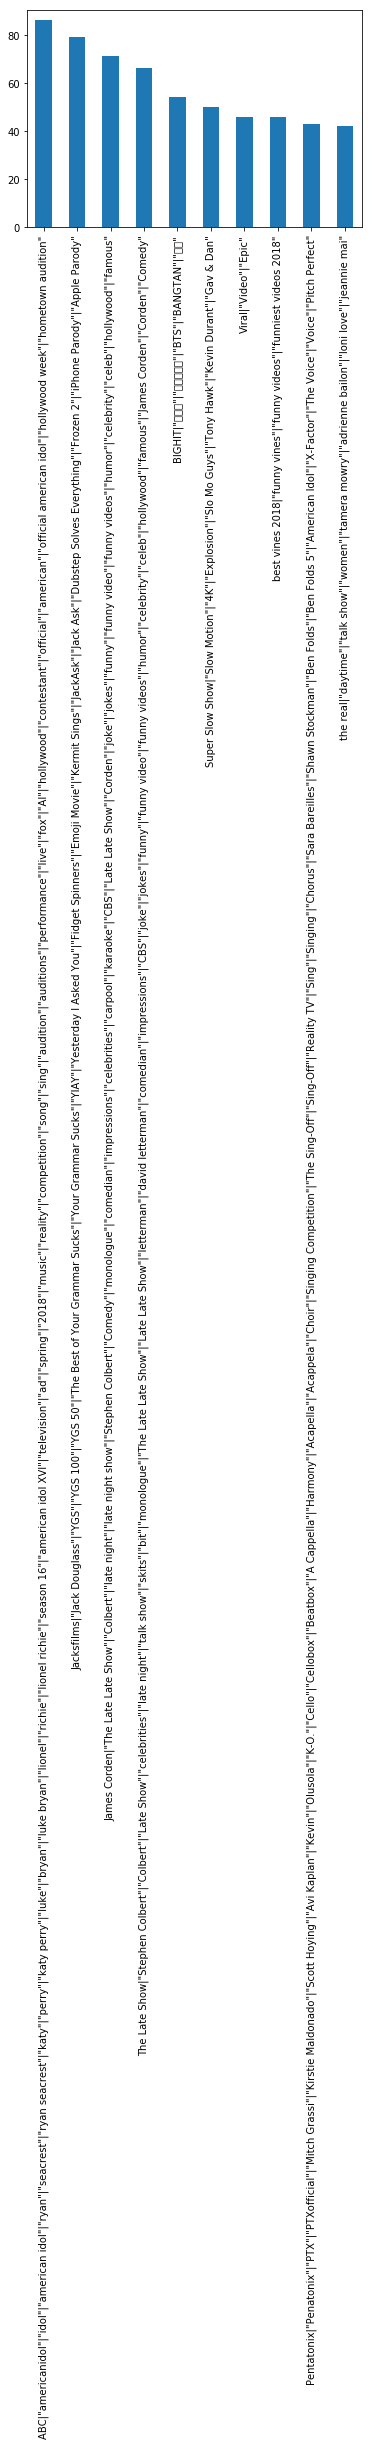

In [14]:
df_us.tags.value_counts()[1:11].plot.bar()

> The graph above shows that there are more than 80 instances that have the same exact list of tags. Since the tags is a long list of complex tags and not a singular word, this leads me to believe one of two things: there is one video with these specific tags that appears more than one time in the dataset, or there are multiple videos by the same channel that put the same tags on multiple videos

In [15]:
print('# of Videos that occur multiple times in the dataset: ', (df_us.video_id.value_counts() > 1).sum())

# of Videos that occur multiple times in the dataset:  5643


> Above we note that there are videos in the dataset that occur more than once, as predicted. We can now try and look to see why these videos appear more than once, given that all exact duplicates have been removed from the dataset

Text(0.5,0,'Date')

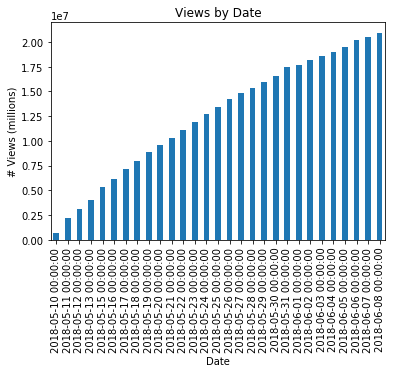

In [16]:
vid_id = '8h--kFui1JA' # found from df_us.video_id.value_counts()
temp = df_us.loc[df_us.video_id == vid_id]
temp.sort_values(by='trending_date')

plt = temp.groupby('trending_date').sum().views.plot.bar()
plt.set_title('Views by Date')
plt.set_ylabel('# Views (millions)')
plt.set_xlabel('Date')

> We can see above that videos that remain on the trending page for multiple days gain more likes and views over the course of their time on the trending page. There is probably a connection that can be found from the average # of views/likes on pages that are only trending one day, versus those videos trending multiple days...

Text(0.5,0,'# of Views')

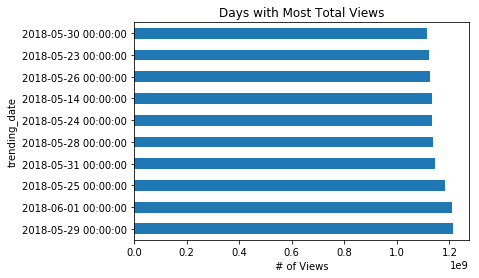

In [100]:
days_views = df_us.groupby(['trending_date']).sum().sort_values(by='views', ascending=False)[:10]['views']
plt = days_views.plot.barh()
plt.set_title('Days with Most Total Views')
plt.set_xlabel('# of Views')

In [69]:
multiple_days = df_us.sort_values(by='views', ascending=True).drop_duplicates(subset='video_id', keep='last')
single_days = df_us.drop_duplicates(subset='video_id', keep=False)

meanM = multiple_days.mean()
meanS = single_days.mean()

Average # views/likes on multiple/single day trending


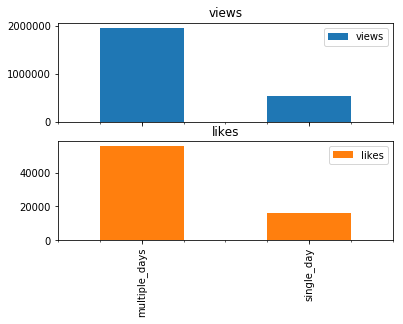

In [97]:
data = {
    'views': [meanM.views, meanS.views],
    'likes': [meanM.likes, meanS.likes]
}
plot_df = pd.DataFrame(data, index=['multiple_days', 'single_day'])
plt = plot_df.plot.bar(subplots=True)
print('Average # views/likes on multiple/single day trending')

> We can clearly see that videos that appear on the trending page for more than 1 day have a higher average number of likes and views than those videos only trending for one day.